In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
c

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

0

In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5216c9d077287ec4763264fa9b1e59f3


In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5216c9d077287ec4763264fa9b1e59f3&q=Boston


In [32]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [33]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [34]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [35]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"},{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":46.24,"feels_like":34.81,"temp_min":43,"temp_max":48.99,"pressure":1011,"humidity":87},"visibility":6437,"wind":{"speed":17.27,"deg":100},"rain":{"1h":3.16},"clouds":{"all":90},"dt":1616955013,"sys":{"type":1,"id":3486,"country":"US","sunrise":1616927586,"sunset":1616972705},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [36]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 46.24,
  'feels_like': 34.81,
  'temp_min': 43,
  'temp_max': 48.99,
  'pressure': 1011,
  'humidity': 87},
 'visibility': 6437,
 'wind': {'speed': 17.27, 'deg': 100},
 'rain': {'1h': 3.16},
 'clouds': {'all': 90},
 'dt': 1616955013,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616927586,
  'sunset': 1616972705},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [37]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [38]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [39]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 46.24,
  'feels_like': 34.81,
  'temp_min': 43,
  'temp_max': 48.99,
  'pressure': 1011,
  'humidity': 87},
 'visibility': 6437,
 'wind': {'speed': 17.27, 'deg': 100},
 'rain': {'1h': 3.16},
 'clouds': {'all': 90},
 'dt': 1616955013,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616927586,
  'sunset': 1616972705},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [40]:
# Get the JSON data.
boston_data = city_weather.json()

In [41]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1616927586,
 'sunset': 1616972705}

In [42]:
boston_data['sys']['country']

'US'

In [43]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 48.99 87 90 17.27


In [44]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 3, 28, 18, 10, 13)

In [45]:

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-28 18:10:13'

In [46]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [49]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [50]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [53]:
(slope, intercept, r_value, _, _) = linregress(x, y)

In [54]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

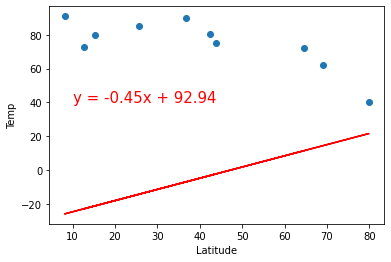

In [55]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()